# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing your daily use machine learning and plotting business

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")

#importing the csv 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.dropna()

#getting rid of all the NaNs

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [6]:
df.groupby('YEAR').describe()
#grouped by years, leading to a chart with 33 groups

print('33 years.')

33 years.


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [20]:
states = df.groupby('STATE')['AVG_MATH_8_SCORE']
#organized the data to show math 8 score data per state across all years

states.describe()

print('Ohio had the higher average in average 8th grade math scores across all years.')




Ohio had the higher average in average 8th grade math scores across all years.


Find the average for your chosen test across all states in 2019

In [23]:
testby2019 = df.groupby('YEAR')['AVG_MATH_8_SCORE']
#grouping by the average math 8 score across the US, by year

testby2019.describe().dropna()
#dropped all nan values because they made it harder to read

print('The mean is 281.')

The mean is 281.


For each state, find a maximum value for your chosen test score

In [35]:
states.describe()
#earlier grouping allowed for the max score to be shown in the far right

,count,mean,std,min,25%,50%,75%,max
STATE,,,,,,,,
ALABAMA,12.0,264.166667,6.042777,252.0,262.00,266.5,269.00,269.0
ALASKA,9.0,280.000000,3.122499,274.0,279.00,280.0,283.00,283.0
ARIZONA,12.0,274.666667,7.139306,260.0,270.50,276.5,280.00,283.0
ARKANSAS,12.0,269.750000,8.708669,256.0,263.75,274.0,275.25,279.0
CALIFORNIA,12.0,269.166667,6.965282,256.0,265.50,270.0,275.25,277.0
COLORADO,11.0,283.181818,7.467505,267.0,282.00,286.0,286.50,292.0
CONNECTICUT,12.0,282.250000,5.395705,270.0,281.00,284.0,285.25,289.0
DELAWARE,11.0,277.181818,7.897065,261.0,277.00,280.0,282.50,284.0
DISTRICT_OF_COLUMBIA,12.0,251.166667,13.482874,231.0,241.00,251.0,263.50,269.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [41]:
df['Expenditure Per Student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
#expenditure per student calculated by the expenditure and divided by the number of students enrolled

df['Difference in Score After 4 Years (Math)'] = df['AVG_MATH_4_SCORE'] - df['AVG_MATH_8_SCORE']
#the difference between the scores of students taking the tests in 4th grade, as opposed to 8th grade


**Feature engineering justification**: I genuinely feel like this is a good metric to use because it seems to be like the most tangible thing you can do to raise a student's test scores. Regardless of how you look at it I feel like a student with teachers that are paid more, and with better equipment for learning, and a better safer learning environment will perform better.

I also added a column that's the difference, whether negative or positive, between the scores of the students who took the scores in 4th grade and 8th grade. Maybe the difference in scores can be attributed to a specific time period within the students' learning lives. For example, minimal change after a high score in 4th grade may be indicative of a lacking 5th-8th education.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='Expenditure Per Student', ylabel='AVG_MATH_8_SCORE'>

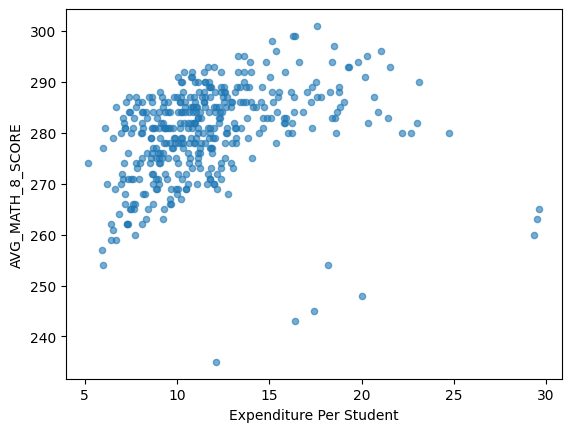

In [42]:
df.plot.scatter(x='Expenditure Per Student', y='AVG_MATH_8_SCORE', alpha=0.6)
#a scatterplot with the expenditure per student as the input, and the corresponding 8 score

It seems to be showing what we all expected--the more that a state invests into their students' educations, the more likely it is for them to score higher than other students across the nation.

**Visualization 2**

<Axes: xlabel='Difference in Score After 4 Years (Math)', ylabel='AVG_MATH_8_SCORE'>

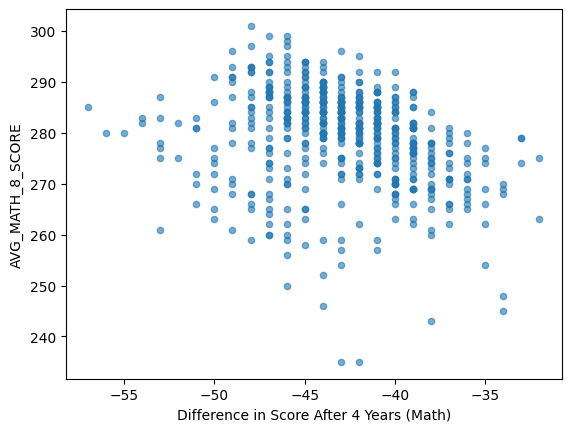

In [45]:
df.plot.scatter(x='Difference in Score After 4 Years (Math)', y='AVG_MATH_8_SCORE', alpha=0.6)
#a scatterplot that uses the difference in scores to produce an output of corresponding 8 scores

This is actually something I never expected. Not only are almost all the scores in the negatives, meaning the scores were reduces from 4th grade to 8th grade, but the more they were reduced by, the higher they actually did relative to everyone else. This is a very weird graph. Perhaps the 4th grade version is way easier.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [46]:
from sklearn.model_selection import train_test_split
#automatically splitting the data into two parts for training and then testing

In [47]:
X = df[['Difference in Score After 4 Years (Math)', 'Expenditure Per Student']].dropna()
#using the input variables as the two I just created, while getting rid of all the NaNs

y = df.loc[X.index]['AVG_MATH_8_SCORE']
#I want to predict the math scores.

y.fillna(y.median(), inplace=True)
#All Y NaNs replaced by the median. As I was taught.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
#I used .3 because we used it last time for the test size

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [49]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression
# i imported my sklearn class here

In [50]:
model = LinearRegression()
#the model, in fact, does use linear regression. in other words, reducing the data into a line that follows a specific slope.


In [51]:
model.fit(X_train, y_train)

#training the model based off data from the input variables I gave

LinearRegression()

In [52]:
y_pred = model.predict(X_test)

#telling it to do its job, and try predicting based off the training. compares it to the test.

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [55]:
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))

#I can tell from the model score that the model is HORRID and I think I know why. I'm pretty certain it's because my two inputs go in complete opposite
#directions. The model is probably struggling to establish any other trend other than the fact there are a ton in the middle. Good to know for next time.
#I suspect that switching the order of the original definition for the new input column I created (difference in test scores) from 4th - 8th to 8th - 4th
#would give a model that's closer to correct.

0.08486047473956349
0.5370070816507909


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

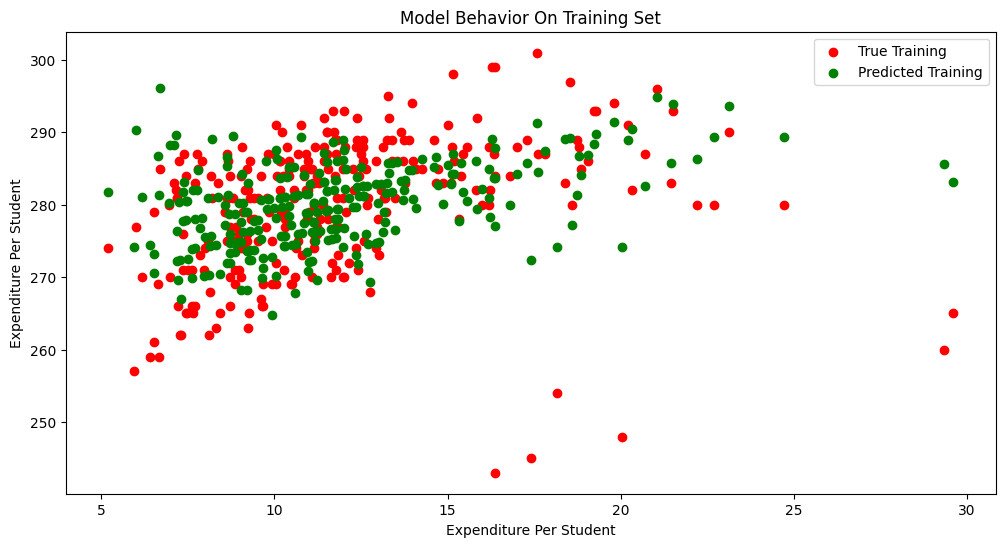

In [61]:
col_name = 'Expenditure Per Student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Expenditure Per Student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

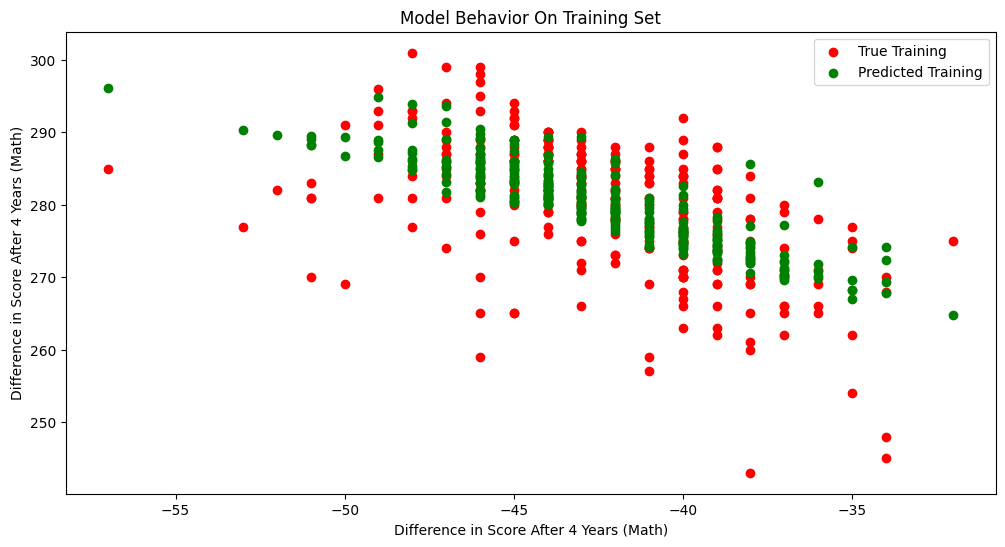

In [63]:
col_name = 'Difference in Score After 4 Years (Math)'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Difference in Score After 4 Years (Math)')
plt.title("Model Behavior On Training Set")

#these two graphs I think confirm the theory I had earlier about the terrible prediction scores--on the own these seem to do fine